<Figure size 300x100 with 0 Axes>

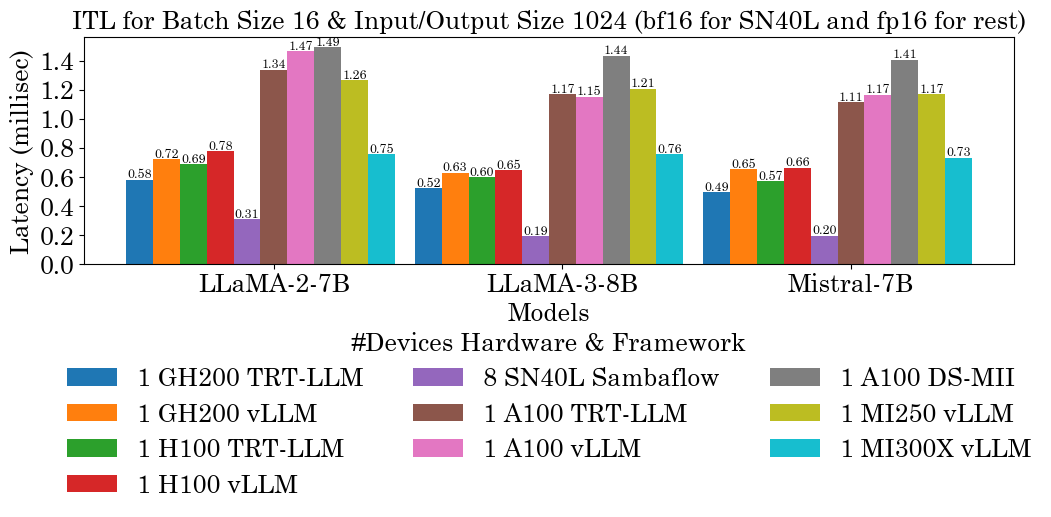

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_TTFT(fig_plot_length=3, fig_plot_height=1, fontsize = 18):
    
    plt.figure(figsize=(fig_plot_length, fig_plot_height))
    plt.rcParams['font.family'] = 'Century Schoolbook'

    # Labels for the models
    labels = ['LLaMA-2-7B', 'LLaMA-3-8B', 'Mistral-7B']

    alias =  {
        "H100_TRT-LLM": "1 H100 TRT-LLM",
        "H100_vLLM": "1 H100 vLLM",
        "SN40L_sambaflow": "8 SN40L Sambaflow",
        "A100_TRT-LLM": "1 A100 TRT-LLM",
        "A100_vLLM": "1 A100 vLLM",
        "A100_DS-MII": "1 A100 DS-MII",
        "GH200_vLLM": "1 GH200 vLLM",
        "GH200_TRT-LLM": "1 GH200 TRT-LLM",
        "MI250_vLLM": "1 MI250 vLLM",
        "MI300x_vLLM": "1 MI300X vLLM"
    }


    # Performance data
    perf_data_TTFT = {
            "GH200_TRT-LLM":[0.3281266689300537,0.35003018379211426,0.3479674577713013],
            "GH200_vLLM":[0.3566369306606551,0.3781235009199008,0.36953612103437383],
            "H100_TRT-LLM":[0.38651649951934813,0.405424165725708,0.4019413948059082],
            "H100_vLLM":[0.4216477160962919,0.42566500790417194,0.42516071242280307],
            "SN40L_sambaflow":[2.85,0.42,0.5],
            "A100_TRT-LLM":[0.9668681621551514,1.050133466720581,1.0446186065673828],
            "A100_vLLM":[1.029996186029166,1.0420479719759896,1.0323134109494276],
            "A100_DS-MII":[1.6275303363800049,2.4138548374176025,1.6925108432769775],
            "MI250_vLLM":[2.1599140379267436,2.1736202720707904,1.9624839581549167],
            "MI300x_vLLM":[2.2758256473345684,2.489681196435898,2.4323179617359227]
                    }

    perf_data_latency = {
            "GH200_TRT-LLM":[9.83061203956604,8.858555221557618, 8.423872923851013],
            "GH200_vLLM":[12.195721102005336, 10.66363345400896, 11.045635434133631],
            "H100_TRT-LLM":[11.6332617521286, 10.157163405418396, 9.701072549819946],
            "H100_vLLM":[13.168710388265511, 11.024687729899984, 11.292688895500032],
            "SN40L_sambaflow":[7.90352146647371, 3.5425630824450263, 3.6948334573664385],
            "A100_TRT-LLM":[22.855718314647675, 20.199362337589264, 19.286153495311737],
            "A100_vLLM":[25.050500875338912, 19.914405192248523, 20.104606724344194],
            "A100_DS-MII":[26.02431893348694, 25.904682874679565, 24.70716118812561],
            "MI250_vLLM":[22.863321285366208, 21.936444972700215, 21.10841013296837],
            "MI300x_vLLM":[14.616763864003588, 14.870041463000234, 14.411066364002181]
                    }
    
    
    perf_data = {}
    
    for key in perf_data_TTFT:
        hardware_TTFT    =  perf_data_TTFT[key]
        hardware_latency =  perf_data_latency[key]
        
        model_ITL = []
        
        for ttft,lat in zip(hardware_TTFT, hardware_latency):
            itl = (lat- ttft)/(16368)
            model_ITL.append(itl*1000)
            
        perf_data[key] = model_ITL 
    
    # Extracting the hardware labels and performance data
    hardware_labels = list(perf_data.keys())
    performance_data = np.array(list(perf_data.values()))

    # Bar width and positions
    bar_width = 0.093
    x = np.arange(len(labels)) # the label locations
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(11, 5.7))

    # Loop through each hardware and plot its corresponding data
#     for i, (hardware, performance) in enumerate(perf_data.items()):
#         ax.bar(x + i * bar_width, performance, bar_width, label=alias[hardware])
    
    for i, (hardware, performance) in enumerate(perf_data.items()):
        bars = ax.bar(x + i * bar_width, performance, bar_width, label=alias[hardware])
        
        # Add text on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.2f}', 
                ha='center', 
                va='bottom', 
                fontsize=9
            )
    
    # Set labels, title, and ticks
    ax.set_xlabel('Models', fontsize=fontsize)
    ax.set_ylabel('Latency (millisec)', fontsize=fontsize)
    ax.set_title('ITL for Batch Size 16 & Input/Output Size 1024 (bf16 for SN40L and fp16 for rest)', fontsize=fontsize)
    ax.set_xticks(x + bar_width * (len(hardware_labels) / 2))
    ax.set_xticklabels(labels, fontsize=fontsize)
    plt.yticks(fontsize = fontsize)

    # Position the legend below the figure
    ax.legend(title='#Devices Hardware & Framework', title_fontsize = fontsize, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=fontsize, frameon = False)

    # Display the plot
    plt.tight_layout()
    plt.savefig("ITL.pdf", dpi=300, bbox_inches='tight', pad_inches=0.03)
    plt.show()

    
    
plot_TTFT()    

In [4]:
# # Performance data
# perf_data_TTFT = {
#         "GH200_vLLM":[0.3566369306606551,0.3781235009199008,0.36953612103437383],
#         "H100_TRT-LLM":[0.38651649951934813,0.405424165725708,0.4019413948059082],
#         "H100_vLLM":[0.4216477160962919,0.42566500790417194,0.42516071242280307],
#         "SN40L_sambaflow":[2.85,0.42,0.5],
#         "A100_TRT-LLM":[0.9668681621551514,1.050133466720581,1.0446186065673828],
#         "A100_vLLM":[1.029996186029166,1.0420479719759896,1.0323134109494276],
#         "A100_DS-MII":[1.6275303363800049,2.4138548374176025,1.6925108432769775],
#         "MI250_vLLM":[2.1599140379267436,2.1736202720707904,1.9624839581549167],
#         "MI300x_vLLM":[2.2758256473345684,2.489681196435898,2.4323179617359227]
#                 }

# perf_data_latency = {
#         "GH200_vLLM":[12.195721102005336, 10.66363345400896, 11.045635434133631],
#         "H100_TRT-LLM":[11.6332617521286, 10.157163405418396, 9.701072549819946],
#         "H100_vLLM":[13.168710388265511, 11.024687729899984, 11.292688895500032],
#         "SN40L_sambaflow":[7.90352146647371, 3.5425630824450263, 3.6948334573664385],
#         "A100_TRT-LLM":[22.855718314647675, 20.199362337589264, 19.286153495311737],
#         "A100_vLLM":[25.050500875338912, 19.914405192248523, 20.104606724344194],
#         "A100_DS-MII":[26.02431893348694, 25.904682874679565, 24.70716118812561],
#         "MI250_vLLM":[22.863321285366208, 21.936444972700215, 21.10841013296837],
#         "MI300x_vLLM":[14.616763864003588, 14.870041463000234, 14.411066364002181]
#                 }


# perf_data = {}

# for key in perf_data_TTFT:
#     hardware_TTFT    =  perf_data_TTFT[key]
#     hardware_latency =  perf_data_latency[key]

#     model_ITL = []

#     for ttft,lat in zip(hardware_TTFT, hardware_latency):
#         itl = (lat- ttft)/(16368)
#         model_ITL.append(itl)

#     perf_data[key] = model_ITL 


In [5]:
# perf_data